<a href="https://colab.research.google.com/github/gaeguriwadukerbi/-zeal/blob/main/deep_learning_redive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset URL: https://www.kaggle.com/datasets/bhuviranga/customer-churn-data
License(s): DbCL-1.0
customer-churn-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  customer-churn-data.zip
  inflating: Bank Customer Churn Prediction.csv  
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         11

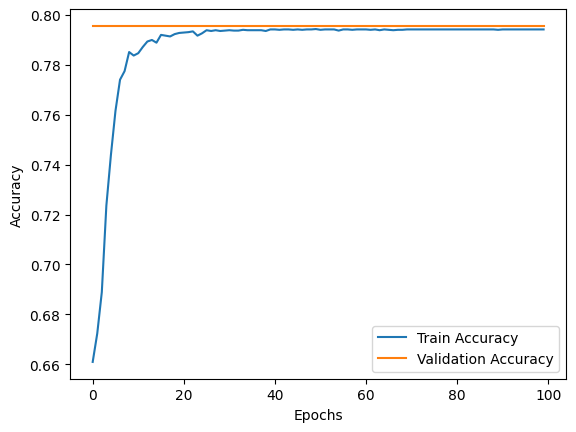

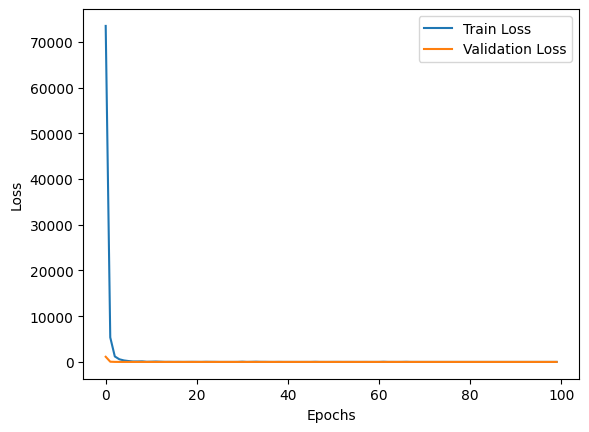

In [4]:
import json
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Kaggle API 설정
!mkdir -p ~/.kaggle
with open('kaggle.json', 'w') as f:
    f.write('{"username":"YOUR_USERNAME","key":"YOUR_KEY"}')
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 데이터셋 다운로드 및 압축 해제
!kaggle datasets download -d bhuviranga/customer-churn-data
!unzip -o customer-churn-data.zip

# 데이터 로드
data = pd.read_csv('Bank Customer Churn Prediction.csv')

# 데이터 확인
print(data.head())
print(data.info())
print(data.describe())

# 존재하는 열 이름 확인
print(data.columns)

# 범주형 변수 및 수치형 변수 전처리
label_encoders = {}
categorical_features = ['country', 'gender']

for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

scaler = StandardScaler()
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

data[numerical_features] = scaler.fit_transform(data[numerical_features])

# 입력 변수(X)와 출력 변수(y) 분리
X = data.drop('churn', axis=1)
y = data['churn']

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 딥러닝 모델 생성
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Dataset URL: https://www.kaggle.com/datasets/bhuviranga/customer-churn-data
License(s): DbCL-1.0
customer-churn-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  customer-churn-data.zip
  inflating: Bank Customer Churn Prediction.csv  
Epoch 1/100
219/219 [==============================] - 6s 19ms/step - loss: 63516.5586 - accuracy: 0.6714 - val_loss: 637.6227 - val_accuracy: 0.8107
Epoch 2/100
219/219 [==============================] - 3s 15ms/step - loss: 8248.8740 - accuracy: 0.6676 - val_loss: 88.3205 - val_accuracy: 0.8107
Epoch 3/100
219/219 [==============================] - 1s 6ms/step - loss: 1423.4017 - accuracy: 0.6687 - val_loss: 95.6426 - val_accuracy: 0.8107
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 606.5951 - accuracy: 0.6647 - val_loss: 20.9338 - val_accuracy: 0.8107
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 315.9753 - accuracy: 0.6686 - val_loss: 4.8035

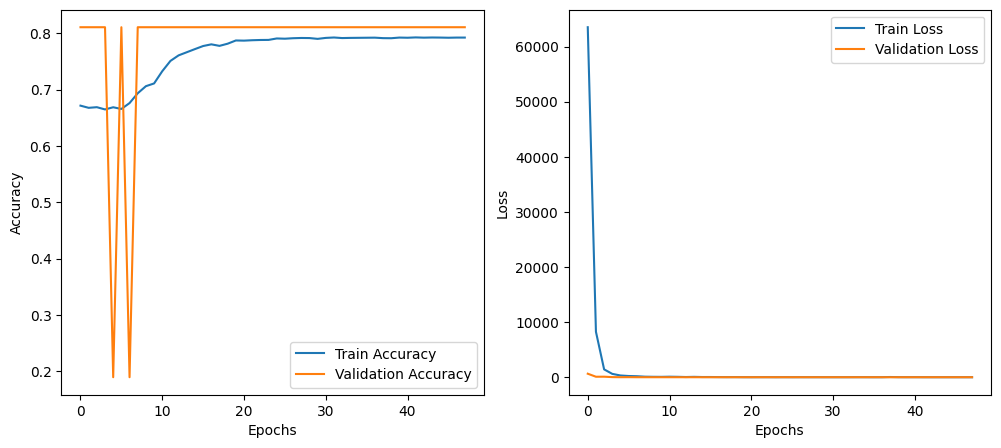

In [5]:
import json
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Kaggle API 설정
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 데이터셋 다운로드 및 압축 해제
!kaggle datasets download -d bhuviranga/customer-churn-data
!unzip -o customer-churn-data.zip

# 데이터 로드
data = pd.read_csv('Bank Customer Churn Prediction.csv')

# 데이터 전처리
label_encoders = {}
categorical_features = ['country', 'gender']
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']

# 범주형 변수 인코딩
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# 수치형 변수 표준화
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# 입력 변수(X)와 출력 변수(y) 분리
X = data.drop('churn', axis=1)
y = data['churn']

# 데이터셋 분할: 훈련, 검증, 테스트 세트
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 신경망 모델 구축
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 조기 종료 콜백 추가
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# 테스트 세트에서 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# 정확도 및 손실 그래프
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Dataset URL: https://www.kaggle.com/datasets/bhuviranga/customer-churn-data
License(s): DbCL-1.0
customer-churn-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  customer-churn-data.zip
  inflating: Bank Customer Churn Prediction.csv  
Epoch 1/100
319/319 [==============================] - 4s 6ms/step - loss: 55843.3594 - accuracy: 0.5030 - val_loss: 171.6025 - val_accuracy: 0.5055
Epoch 2/100
319/319 [==============================] - 1s 4ms/step - loss: 1969.4341 - accuracy: 0.4950 - val_loss: 4.1480 - val_accuracy: 0.4945
Epoch 3/100
319/319 [==============================] - 2s 7ms/step - loss: 576.5926 - accuracy: 0.5034 - val_loss: 0.6931 - val_accuracy: 0.5055
Epoch 4/100
319/319 [==============================] - 3s 10ms/step - loss: 216.0714 - accuracy: 0.5044 - val_loss: 0.6931 - val_accuracy: 0.5055
Epoch 5/100
319/319 [==============================] - 4s 13ms/step - loss: 162.4855 - accuracy: 0.5057 - val_loss: 0.6931 - v

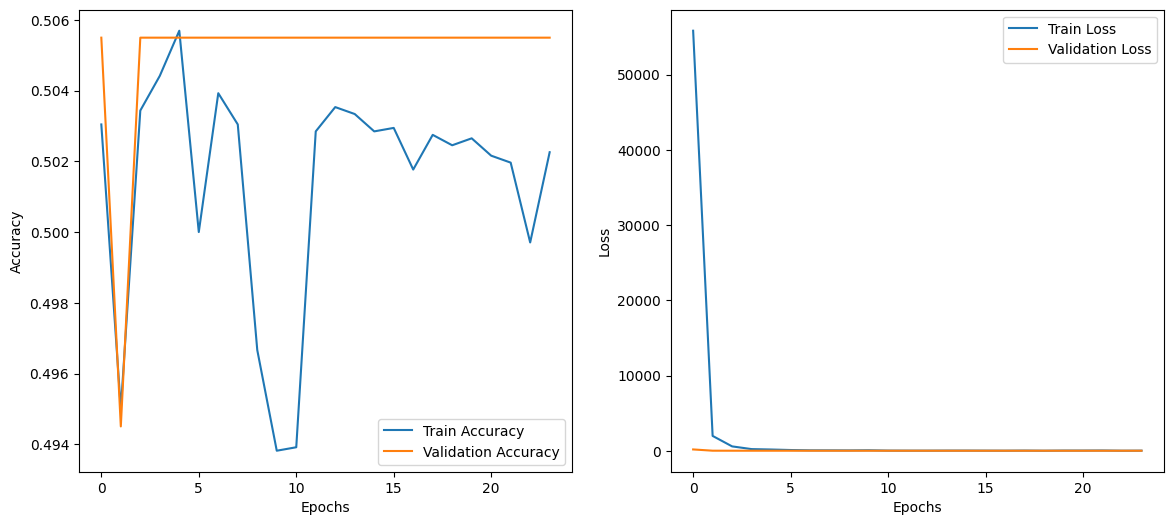

In [6]:
import json
import os

# Kaggle API 설정
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 데이터셋 다운로드 및 압축 해제
!kaggle datasets download -d bhuviranga/customer-churn-data
!unzip -o customer-churn-data.zip

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

# 데이터 로드
data = pd.read_csv('Bank Customer Churn Prediction.csv')

# 데이터 전처리
categorical_features = ['country', 'gender']
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']

# 범주형 변수 인코딩
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# 수치형 변수 표준화
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# 입력 변수(X)와 출력 변수(y) 분리
X = data.drop('churn', axis=1)
y = data['churn']

# 데이터 불균형 해결을 위한 오버샘플링
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 모델 구성
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# 최종 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# 결과 시각화
import matplotlib.pyplot as plt

# 정확도 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/100
200/200 [==============================] - 5s 15ms/step - loss: 0.4598 - accuracy: 0.8012 - val_loss: 0.3838 - val_accuracy: 0.8250
Epoch 2/100
200/200 [==============================] - 2s 11ms/step - loss: 0.4028 - accuracy: 0.8266 - val_loss: 0.3604 - val_accuracy: 0.8537
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3868 - accuracy: 0.8388 - val_loss: 0.3530 - val_accuracy: 0.8575
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3772 - accuracy: 0.8452 - val_loss: 0.3472 - val_accuracy: 0.8625
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3697 - accuracy: 0.8455 - val_loss: 0.3440 - val_accuracy: 0.8581
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3633 - accuracy: 0.8508 - val_loss: 0.3492 - val_accuracy: 0.8600
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3610 - accuracy: 0.8517 - val_loss: 0.3504 - val_accuracy: 0.85

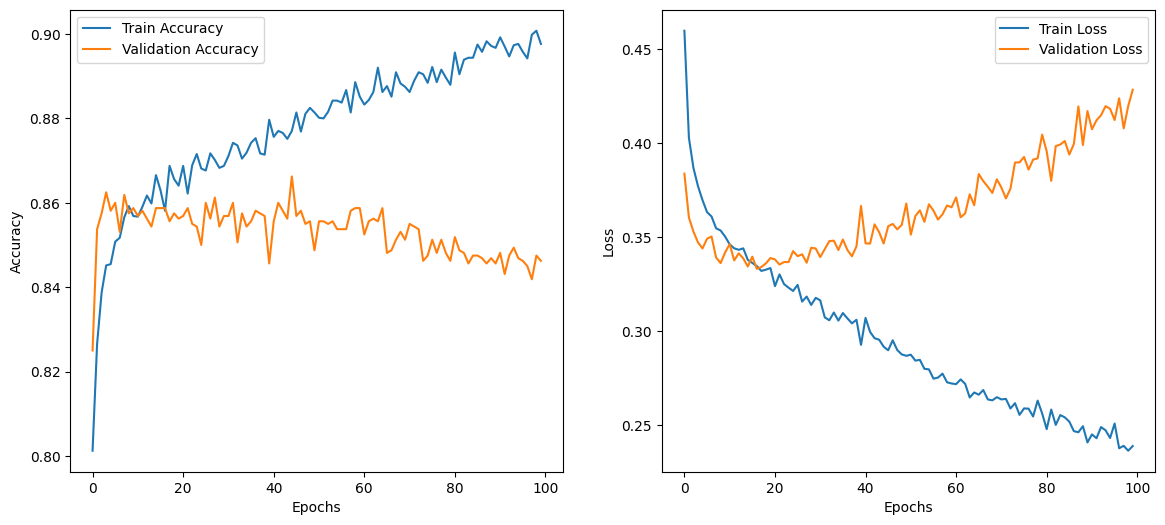

63/63 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8530
Test Loss: 0.4202890992164612
Test Accuracy: 0.8529999852180481


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('Bank Customer Churn Prediction.csv')

# 데이터 전처리
data = data.drop('customer_id', axis=1)

# 범주형 변수 인코딩
label_encoders = {}
categorical_features = ['country', 'gender']

for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# 수치형 변수 표준화
scaler = StandardScaler()
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# 입력 변수(X)와 출력 변수(y) 분리
X = data.drop('churn', axis=1)
y = data['churn']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 모델 정의
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# 학습 결과 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 테스트 데이터에서 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


In [14]:
import pandas as pd

# 파일 경로 지정
data_path = '/content/Bank Customer Churn Prediction.csv'

# 데이터 로드
data = pd.read_csv(data_path)

# 데이터 확인
print(data.head())



   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 로드
data_path = '/content/Bank Customer Churn Prediction.csv'
data = pd.read_csv(data_path)

# 범주형 변수 인코딩
data['country'] = LabelEncoder().fit_transform(data['country'])
data['gender'] = LabelEncoder().fit_transform(data['gender'])

# 특성과 레이블 분리
X = data.drop(columns=['customer_id', 'churn'])
y = data['churn']

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64
Epoch 1/100
200/200 [==============================] - 2s 5ms/step - loss: 0.5370 - accuracy: 0.7608 - val_loss: 0.4416 - val_accuracy: 0.8000
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4766 - accuracy: 0.7981 - val_loss: 0.4229 - val_accuracy: 0.8175
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4566 - accuracy: 0.8047 - val_loss: 0.4161 - val_accuracy: 0.8269
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.8087 - val_loss: 0.4104 - val_accuracy: 0.8350
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.8158 - val_loss: 0.3995 - val_accuracy: 0.8419
Epoch 6/

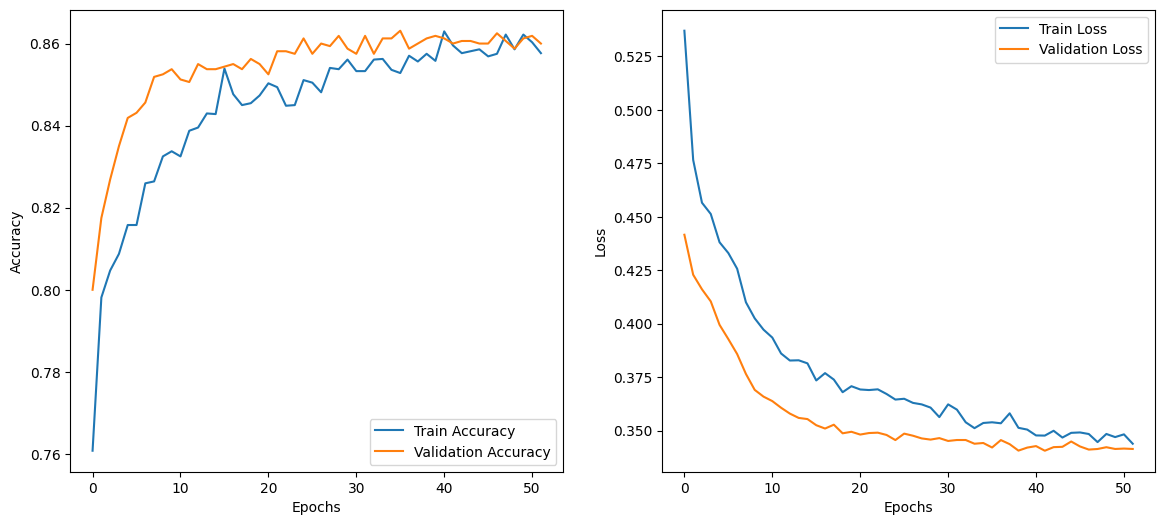

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# 데이터 경로 설정 (업로드된 파일 경로로 설정)
data_path = '/content/Bank Customer Churn Prediction.csv'

# 데이터 로드
data = pd.read_csv(data_path)

# 결측값 확인
print(data.isnull().sum())

# 결측값 제거 (없을 경우 이 부분 생략 가능)
data = data.dropna()

# 범주형 변수 인코딩
data = pd.get_dummies(data, drop_first=True)

# 입력 변수(X)와 출력 변수(y) 분리
X = data.drop('churn', axis=1)
y = data['churn']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 구성
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 조기 종료 콜백
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# 성능 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# 정확도와 손실 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()